# Domain analysis

In this notebook I analyze the clustered data for temperature, relative humidity and surface pressure.

I want to measure the relative shift of the data distribution for each domain.

In [6]:
import os
import glob
import xarray as xr
import dask
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Define the directory containing NetCDF files
data_dir = "/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/0"

# Construct the file path pattern
file_pattern = sorted(glob.glob(f"{data_dir}/9_6*.nz"))
print(len(file_pattern))

# Open multiple files as a single dataset using dask for efficiency
ds = xr.open_mfdataset(file_pattern, combine="by_coords", parallel=True, engine="netcdf4")

2879
['/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/0/9_6_lffd20101101000000_blurred_x8.nz', '/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/0/9_6_lffd20101101010000_blurred_x8.nz', '/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/0/9_6_lffd20101101020000_blurred_x8.nz', '/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/0/9_6_lffd20101101030000_blurred_x8.nz', '/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/0/9_6_lffd20101101040000_blurred_x8.nz', '/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/0/9_6_lffd20101101050000_blurred_x8.nz', '/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/0/9_6_lffd20101101060000_blurred_x8.nz', '/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/0/9_6_lffd20101101070000_blurred_x8.nz', '/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/0/9_6_lffd20101101080000_blurred_x8.nz', '/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/0/9_6_lffd20101

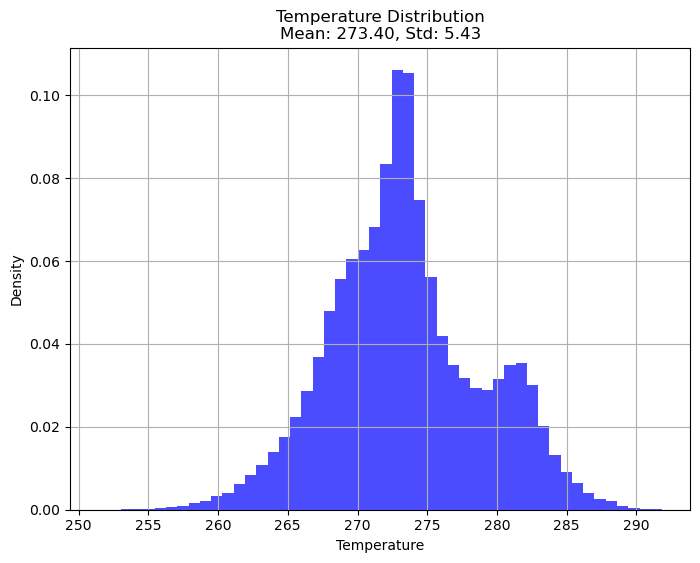

Mean Temperature: 273.40
Standard Deviation: 5.43


In [10]:
t2m = ds["T_2M"].load()  # Load into memory for computations

# Compute statistics
mean_temp = t2m.mean().item()  # Convert to scalar
std_temp = t2m.std().item()

# Plot distribution
plt.figure(figsize=(8, 6))
plt.hist(t2m.values.flatten(), bins=50, density=True, alpha=0.7, color="b")
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.title(f"Temperature Distribution\nMean: {mean_temp:.2f}, Std: {std_temp:.2f}")
plt.grid(True)
plt.show()

# Close dataset to free resources
ds.close()

# Print computed statistics
print(f"Mean Temperature: {mean_temp:.2f}")
print(f"Standard Deviation: {std_temp:.2f}")

In [11]:
# Define the directory containing NetCDF files
data_dir = "/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/1"

# Construct the file path pattern
file_pattern = sorted(glob.glob(f"{data_dir}/5_7_*.nz"))
print(len(file_pattern))

# Open multiple files as a single dataset using dask for efficiency
ds = xr.open_mfdataset(file_pattern, combine="by_coords", parallel=True, engine="netcdf4")

2879


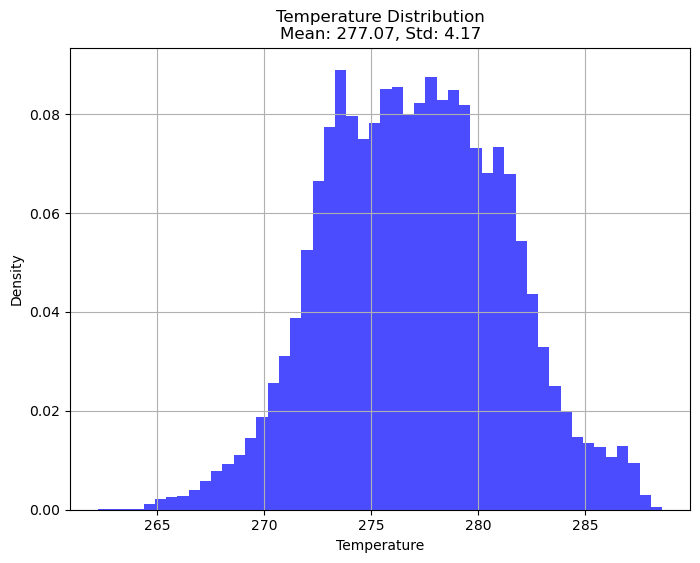

Mean Temperature: 277.07
Standard Deviation: 4.17


In [12]:
t2m = ds["T_2M"].load()  # Load into memory for computations

# Compute statistics
mean_temp = t2m.mean().item()  # Convert to scalar
std_temp = t2m.std().item()

# Plot distribution
plt.figure(figsize=(8, 6))
plt.hist(t2m.values.flatten(), bins=50, density=True, alpha=0.7, color="b")
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.title(f"Temperature Distribution\nMean: {mean_temp:.2f}, Std: {std_temp:.2f}")
plt.grid(True)
plt.show()

# Close dataset to free resources
ds.close()

# Print computed statistics
print(f"Mean Temperature: {mean_temp:.2f}")
print(f"Standard Deviation: {std_temp:.2f}")

In [ ]:
# Define the directory containing NetCDF files
data_dir = "/Users/fquareng/data/1h_2D_sel_cropped_blurred_x8_clustered/2"

# Construct the file path pattern
file_pattern = sorted(glob.glob(f"{data_dir}/6_5_*.nz"))
print(len(file_pattern))

# Open multiple files as a single dataset using dask for efficiency
ds = xr.open_mfdataset(file_pattern, combine="by_coords", parallel=True, engine="netcdf4")

2879


In [ ]:
t2m = ds["T_2M"].load()  # Load into memory for computations

# Compute statistics
mean_temp = t2m.mean().item()  # Convert to scalar
std_temp = t2m.std().item()

# Plot distribution
plt.figure(figsize=(8, 6))
plt.hist(t2m.values.flatten(), bins=50, density=True, alpha=0.7, color="b")
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.title(f"Temperature Distribution\nMean: {mean_temp:.2f}, Std: {std_temp:.2f}")
plt.grid(True)
plt.show()

# Close dataset to free resources
ds.close()

# Print computed statistics
print(f"Mean Temperature: {mean_temp:.2f}")
print(f"Standard Deviation: {std_temp:.2f}")